<a href="https://colab.research.google.com/github/HillaAnku/HillaAnku/blob/master/Customer_segmentation_(Unsupervised_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

The insurance market is a very large one and competition is very rife. As such, it is imperative that marketing teams have a clear vision of their target groups. In this project, I work with an autoinsurance customer dataset and decipher the various customer groups. The aim is to identify the number of clusters in the dataset and subsequently describe those clusters for the purposes of targeted insurance marketing.

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

In [ ]:
# load dataset

insurance_df = pd.read_csv('/content/drive/My Drive/python_for_data_scientists/AutoInsurance.csv')

In [ ]:
# display all the columns of the dataset

pd.options.display.max_columns = None

In [ ]:
# Quick view data

insurance_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# Drop non-numerical columns

model_data = insurance_df.drop(['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                               'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type',
                               'Policy', 'Renew Offer Type', 'Sales Channel',
                               'Vehicle Class', 'Vehicle Size'], axis = 1)

In [ ]:
# View dataframe

model_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [ ]:
# Standarizing the features

scaler = StandardScaler()
X_std = scaler.fit_transform(model_data)

Now, the data is ready for exploration.I apply assorted clustering algorithms and visualize these methods to decipher clusters.

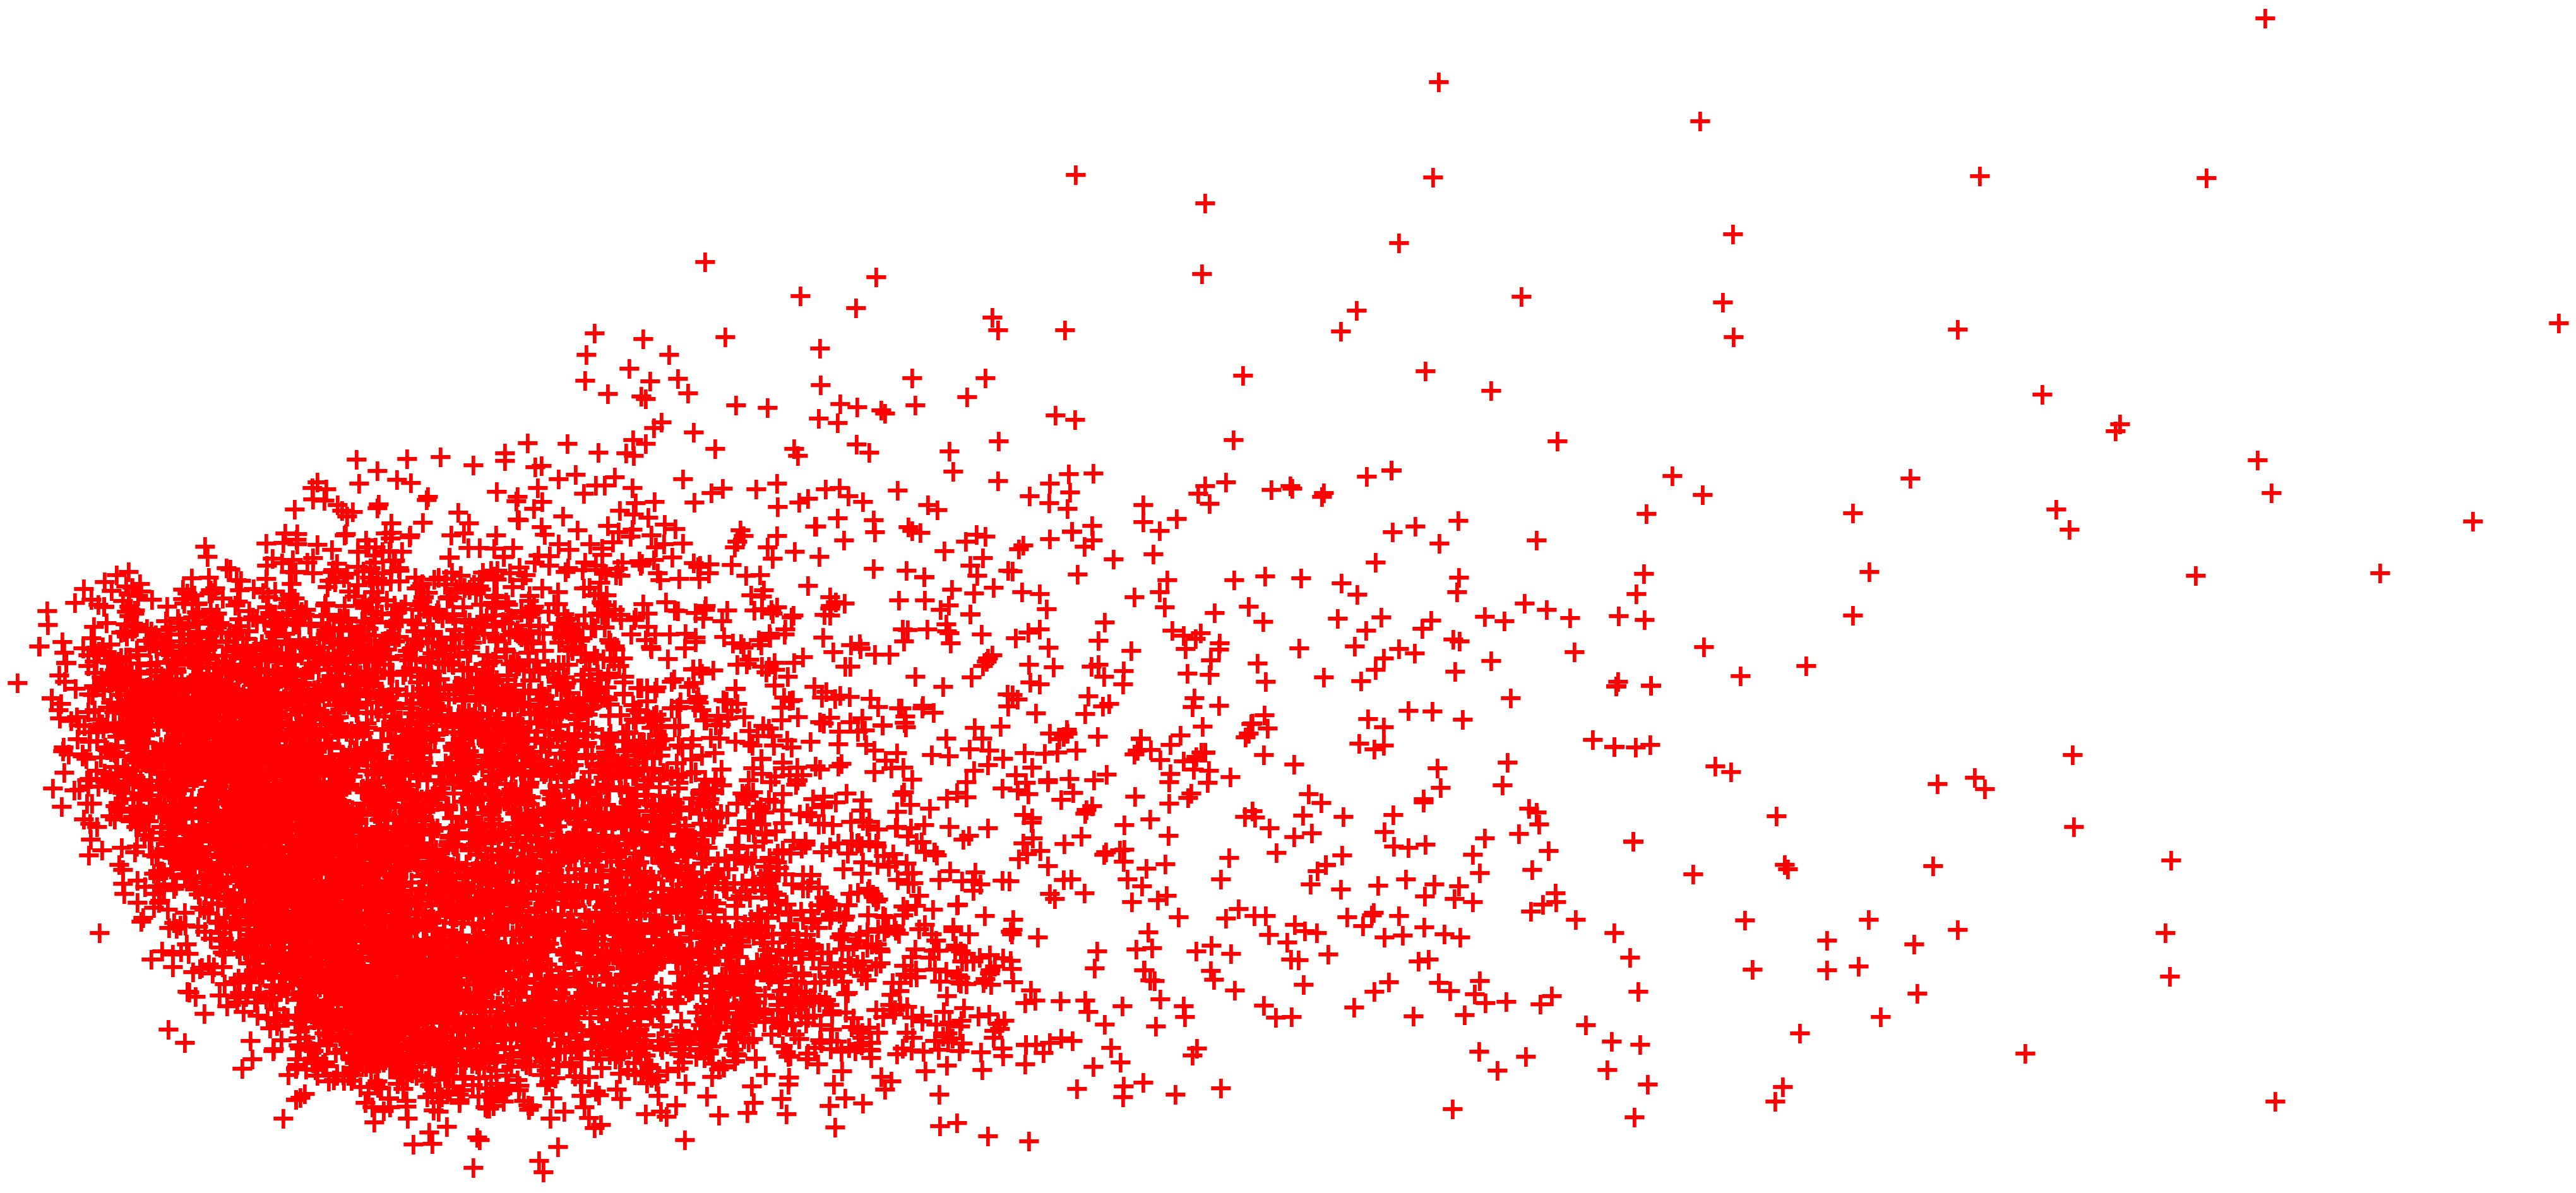

In [ ]:
# To get a sense of how the data spreads out, firstly, I make a 2D representation with PCA

pca_ = PCA(n_components = 2).fit_transform(X_std)

for i in range(pca_.shape[0]):
    plt.text(pca_[i, 0], pca_[i, 1], '+',
             color='r',
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The dats is quiet closely clustered with no readily discernible groups. I proceed with to apply some agglomerative algorithms using some dimensioanlity reduction techniques.

In [ ]:
# Apply t-SNE to descern some clusters

from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_ = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9134 samples in 0.036s...
[t-SNE] Computed neighbors for 9134 samples in 1.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9134
[t-SNE] Computed conditional probabilities for sample 2000 / 9134
[t-SNE] Computed conditional probabilities for sample 3000 / 9134
[t-SNE] Computed conditional probabilities for sample 4000 / 9134
[t-SNE] Computed conditional probabilities for sample 5000 / 9134
[t-SNE] Computed conditional probabilities for sample 6000 / 9134
[t-SNE] Computed conditional probabilities for sample 7000 / 9134
[t-SNE] Computed conditional probabilities for sample 8000 / 9134
[t-SNE] Computed conditional probabilities for sample 9000 / 9134
[t-SNE] Computed conditional probabilities for sample 9134 / 9134
[t-SNE] Mean sigma: 0.592426
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.224747
[t-SNE] KL divergence after 300 iterations: 2.838032
t-SNE done! Time elapsed: 27.231280565

In [ ]:
# Visualize t-SNE

plt.figure(figsize=(15,5))
for i in range(tsne_.shape[0]):
    plt.text(tsne_[i, 0], tsne_[i, 1], '+',
             color = 'r',
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

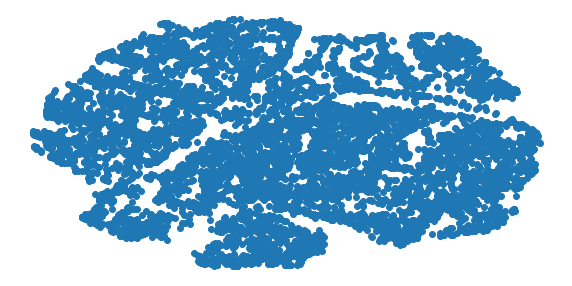

In [ ]:
# Plot 2D representation without color

plt.figure(figsize=(10,5))
plt.scatter(tsne_[:, 0], tsne_[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

With T-SNE, some clusters are can be deciphered at this point, however, it isn't too clear how many clusters. I proceed to apply UMAP.

In [ ]:
# Apply UMAP to descern clusters

import umap

time_start = time.time()

umap_ = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 23.466598749160767 seconds


In [ ]:
# Visualize UMAP

plt.figure(figsize=(10,5))
for i in range(umap_.shape[0]):
    plt.text(umap_[i, 0], umap_[i, 1], '+',
             color='r',
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

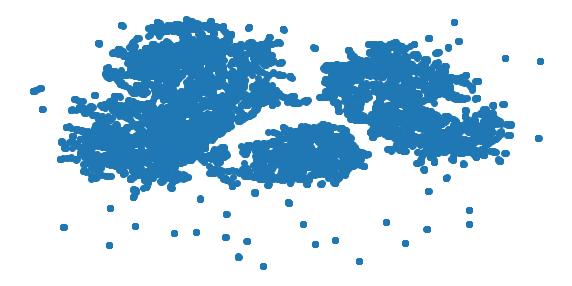

In [ ]:
# Plot UMAP without color

plt.figure(figsize=(10,5))
plt.scatter(umap_[:, 0], umap_[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

From the umap visualization, 4 distinct clusters can be seen. I proceed to identify the clusters by using a 2 dimensional x-y plane. I attach an x-y plane to the 2D cluster representation below, this way I can describe the clusters.

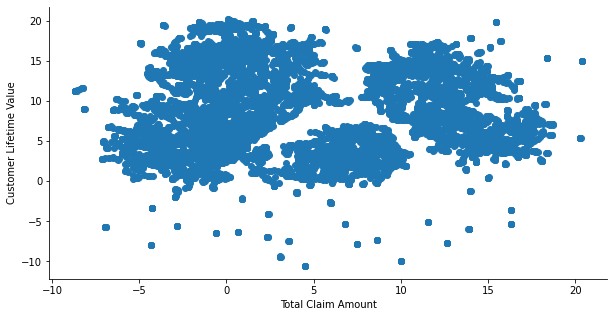

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_[:, 0], umap_[:, 1])
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.axis('on')
sns.despine();

The 2D plot shows the distribution of the clusters. Using customer lifetime value which is a source of revenue to the insurance company and Total Claim Amount which is a cost variable to the insurance company, I interpret the clusters as follows:

Cluster 1. High Lifetime Value, Low Claims: These customers have high lifetime value and very low total claim amounts. For the insurance company, this is the group that must be targeted the most.

Cluster 2: Lower Lifetime Value, Fairly High Total Claims: These customers have a faily high lifetime value but their Total claims are higher than those in Cluster 1.

Cluster 3: Low Lifetime Value, High Claims: These customers are those who have a low lifetime value but have high total claims. This customer group is a risky group.

Cluster 4: High Lifetime Value, High Claims: This group of customers have a high lifetime value but they also have high total claims to match.

**Conclusion**

In this autoinsurance customer dataset, taking the data through various unsupervised machine learning methods has revealed four distinct clusters in the dataset. The clusters have been described in terms of the group's lifetime value and total claim amount. For the purposes of targeting and marketing, this customer segmentation information can used to determine which clusters to target, how to reach them and what insurance packages can be tailored to each group.